# Summary

This is the first notebook of this study, it is dedicated to EDA (exploratory data analysis) of Severstal data, including data cleaning. All notebooks follow the same structure: 

Summary: a brief explanation of general objectives

Table of Contents: list of related content

Requirements: required packages

Data Loading: input data for analysis

Main activities: selected analysis, transformation or training for this specific notebook



# Table of Contents

1. Requirements
2. Data Loading
3. EDA
4. Data Export

# Requirements

In [ ]:
#load packages
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline
from zipfile import ZipFile

# Data Loading

In [ ]:
#integrating colab to google drive
"""
original dataset can be downloaded in kaggle:severstal page.
it was extraced in a local folder
"""

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#read the files in root directory
my_drive = '/content/drive/My Drive/Colab Notebooks/'
print(os.listdir(my_drive)

['sample_submission.csv', 'train.csv', 'Copy of Severstal_data_analysis.ipynb', 'models', 'df_master.csv', 'train_images', '2-MaskVisualization.ipynb', '3-Classification.ipynb', '1-EDA.ipynb']


In [ ]:
#creating dataaframes from train.csv and sample_submission.csv
"""
train_images: folder with labeled data

test_images: folder with unlabeled data

train.csv: files containing a list of images with defects, class defect and enconded pixels.

sample_submission.csv: file containing list of test images to be classified.

"""
train_path = '/content/drive/My Drive/Colab Notebooks/train_images/'
test_path = '/content/drive/My Drive/Colab Notebooks/test_images/'
train_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train.csv')
sub_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/sample_submission.csv')

# Exploratory Data Analysis

In [ ]:
#check train_df
train_df.head()

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7095 entries, 0 to 7094
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ImageId        7095 non-null   object
 1   ClassId        7095 non-null   int64 
 2   EncodedPixels  7095 non-null   object
dtypes: int64(1), object(2)
memory usage: 166.4+ KB


In [ ]:
train_df.nunique()

ImageId          6666
ClassId             4
EncodedPixels    7095
dtype: int64

Train_df is composed by 7095 lines, each rows contain a unique encoded pixels in RLE format for one specific ClassId. Notice that multiple lines can refer to same ImageId, that is, if a given image has 2 defects this ImageId will show up twice, each line will have a different ClassId and Encoded Pixel.

The following steps were done in order to create a new format dataframe, in which each line corresponds to one unique ImageId with multiple ClassId and Encoded Pixels. This is done to help listing and separating images for either ClassId or Defect.

In [ ]:
#groupby applied to ClassId and EncodedPixels
train_df2 = train_df.groupby('ImageId')['ClassId'].apply(list).reset_index()
train_df2 = train_df2.astype(str)
train_df3 = train_df.groupby('ImageId')['EncodedPixels'].apply(list).reset_index()
train_df3 = train_df3.astype(str)

In [ ]:
#checking dataframe
train_df2.head()

,ImageId,ClassId
0,0002cc93b.jpg,[1]
1,0007a71bf.jpg,[3]
2,000a4bcdd.jpg,[1]
3,000f6bf48.jpg,[4]
4,0014fce06.jpg,[3]


In [ ]:
#checking dataframe
train_df3.head()

,ImageId,EncodedPixels
0,0002cc93b.jpg,['29102 12 29346 24 29602 24 29858 24 30114 24...
1,0007a71bf.jpg,['18661 28 18863 82 19091 110 19347 110 19603 ...
2,000a4bcdd.jpg,['37607 3 37858 8 38108 14 38359 20 38610 25 3...
3,000f6bf48.jpg,['131973 1 132228 4 132483 6 132738 8 132993 1...
4,0014fce06.jpg,['229501 11 229741 33 229981 55 230221 77 2304...


In [ ]:
#check sub_df
sub_df.head()

,ImageId,EncodedPixels,ClassId
0,0000f269f.jpg,1 409600,0
1,000ccc2ac.jpg,1 409600,0
2,002451917.jpg,1 409600,0
3,003c5da97.jpg,1 409600,0
4,0042e163f.jpg,1 409600,0


In [ ]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5506 entries, 0 to 5505
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ImageId        5506 non-null   object
 1   EncodedPixels  5506 non-null   object
 2   ClassId        5506 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 129.2+ KB


In [ ]:
sub_df.ImageId.value_counts()

d37248c9c.jpg    1
39131a7b3.jpg    1
2209ff22d.jpg    1
f1460236d.jpg    1
371bb49cf.jpg    1
                ..
96fefb723.jpg    1
16b6212be.jpg    1
d86f86d8e.jpg    1
fc923ef78.jpg    1
783ff5f7e.jpg    1
Name: ImageId, Length: 5506, dtype: int64

In [ ]:
sub_df.ClassId.value_counts()

0    5506
Name: ClassId, dtype: int64

Sub_df is the original submission file that competitors must've tested their own models in order to be ranked in Kaggle leaderboard. Important notice that sub_df has little to no usefull information for this work, so it'll not be used during this analysis. 

In [ ]:
#get full list of files in train folder
list_train_df = os.listdir(train_path)

In [ ]:
#checking number of files in train_images
print('Number of files in train_images: {}'.format(len(list_train_df)))

Number of files in train_images: 12568


In [ ]:
#creating train dataframe from list
df_master = pd.DataFrame(list_train_df, columns =['ImageId'])

In [ ]:
#check dataset
df_master.head()

,ImageId
0,eb1f38f03.jpg
1,e9b77950e.jpg
2,e8a40861a.jpg
3,e9b10d130.jpg
4,ec2ce528a.jpg


In [ ]:
#creating two columns: defect and defect_no
"""
defect: boolean 'yes' or 'no'
defect_no: number of defects in same image

"""
df_master['Defect'] = None
df_master['Defect_no'] = None

In [ ]:
#checking dataset
df_master.head()

,ImageId,Defect,Defect_no
0,eb1f38f03.jpg,None,None
1,e9b77950e.jpg,None,None
2,e8a40861a.jpg,None,None
3,e9b10d130.jpg,None,None
4,ec2ce528a.jpg,None,None


In [ ]:
#merging ClassId and EncodedPixels to master dataset
df_master = pd.merge(left=df_master, right=train_df2, how='left', left_on='ImageId', right_on='ImageId')
df_master = pd.merge(left=df_master, right=train_df3, how='left', left_on='ImageId', right_on='ImageId')

In [ ]:
#checking dataset
df_master.head()

,ImageId,Defect,Defect_no,ClassId,EncodedPixels
0,eb1f38f03.jpg,None,None,"[3, 4]",['51671 4 51923 10 52174 18 52426 24 52678 30 ...
1,e9b77950e.jpg,None,None,"[1, 3]",['378485 4 378733 13 378985 18 379241 18 37949...
2,e8a40861a.jpg,None,None,[3],['72226 31 72451 62 72707 62 72963 62 73219 61...
3,e9b10d130.jpg,None,None,NaN,NaN
4,ec2ce528a.jpg,None,None,NaN,NaN


In [ ]:
#fitting defect information
for i in range(len(df_master)):
    if df_master['ClassId'].isnull()[i]:
        df_master['Defect'][i] = 'no'
    else:
        df_master['Defect'][i] = 'yes'

In [ ]:
#fitting no defect information
for i in range(len(df_master)):
    if df_master['ClassId'].isnull()[i]:
        df_master['ClassId'][i] = [0]

In [ ]:
#fitting no encoding information
for i in range(len(df_master)):
    if df_master['EncodedPixels'].isnull()[i]:
        df_master['EncodedPixels'][i] = None

In [ ]:
#fitting defect_no column
for i in range(len(df_master)):
    if df_master['Defect'][i] == 'no':
        df_master['Defect_no'] = 0

In [ ]:
#ClassId to strings
df_master['ClassId'].astype(str).unique()

array(['[3, 4]', '[1, 3]', '[3]', '[0]', '[1]', '[4]', '[2]', '[1, 2, 3]',
       '[1, 2]', '[2, 3]', '[2, 4]'], dtype=object)

In [ ]:
#Counting defect_no
for i in df_master.index:
    for classes in df_master['ClassId'].astype(str).unique():
        if df_master['ClassId'][i] == classes:
            df_master['Defect_no'][i] = int(np.ceil(len(classes)/3))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
#Converting to strings
df_master['Defect'] = df_master['Defect'].astype(str)
df_master['Defect_no'] = df_master['Defect_no'].astype(str)
df_master['ClassId'] = df_master['ClassId'].astype(str)

In [ ]:
#check how many image has any defect or no defect

train_def = df_master[df_master['Defect'] == 'yes']
train_nodef = df_master[df_master['Defect'] == 'no']

print('Number of train images with defects: {}'.format(len(train_def)))
print('Number of train images with no defects: {}'.format(len(train_nodef)))

Number of train images with defects: 6666
Number of train images with no defects: 5902


Train dataset is composed by 12568 images: 6666 images with at least 1 defect and 5902 with no defects.

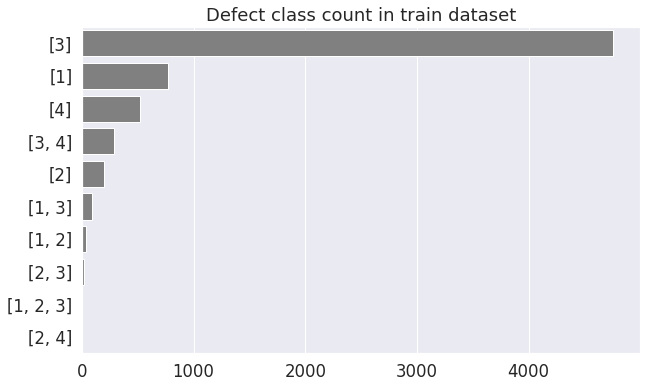

In [ ]:
#plotting number of defects class counts
sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(y = "ClassId", 
                   data = train_def, 
                   color = "gray",
                   order = train_def.ClassId.astype(str).value_counts().index)
ax.set_ylabel('')    
ax.set_xlabel('')
ax.set_title('Defect class count in train dataset');

The above chart shows that dataset is very unbalanced with regard to classes, with more than half data being exclusively to [3]. This reveals the necessity in balancing the train-val-test dataset prior to training step. Otherwise, we can infer this bias to the classification model, as well as, distort metrics like accuracy and precision.

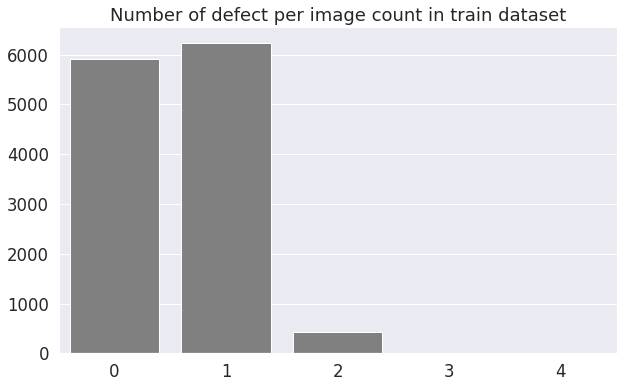

In [ ]:
#Plotting Proper risk rating status
sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(x = "Defect_no", 
                   data = df_master, 
                   color = "gray",
                   order = ['0', '1', '2', '3', '4'])
ax.set_ylabel('')    
ax.set_xlabel('')
ax.set_title('Number of defect per image count in train dataset');

The above chart shows the number of defects per image, so that most images has at least 1 defect (represented by 1) or no defect (represented by 0). Very few images has 2 or more defects, and no image has all 4-class defects together at any given time.

# Data Export

In [ ]:
#exporting master dataframe for future steps
df_master.to_csv('/content/drive/My Drive/Colab Notebooks/df_master.csv', index=False)

df_master is the principal dataframe that will be invoked in the nexts notebooks, so it will be exported to local folder.